In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = [20,10]
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [4]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [5]:
df.groupby('Province/State')['Province/State'].agg('count')

Province/State
 Montreal, QC           10
 Norfolk County, MA      5
Abruzzo                381
Acre                   375
Adygea Republic        363
                      ... 
Zaporizhia Oblast      363
Zeeland                317
Zhejiang               494
Zhytomyr Oblast        363
Zuid-Holland           317
Name: Province/State, Length: 736, dtype: int64

In [6]:
df2 = df.copy()
df2 = df2.drop('Province/State', axis=1)
df2

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [7]:
df2.isnull().sum()

SNo                0
ObservationDate    0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [8]:
df2['Country/Region'].value_counts()

Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: count, Length: 229, dtype: int64

In [9]:
df3=df2.copy()
df3[['Confirmed', 'Deaths', 'Recovered']] = df2[['Confirmed', 'Deaths', 'Recovered']].abs()
negative_value = df3[(df3['Recovered'] < 0) | (df3['Deaths'] < 0) | (df3['Confirmed'] < 0)]
negative_value

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered


In [10]:
df3

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [11]:
confirmed_by_country_sorted= df3.groupby('Country/Region')['Confirmed'].sum().reset_index().sort_values(by='Confirmed', ascending=False)
confirmed_by_country_sorted.head(10)

,Country/Region,Confirmed
214,US,6.049146e+09
96,India,3.226768e+09
27,Brazil,2.653588e+09
172,Russia,9.305488e+08
71,France,8.551890e+08
213,UK,7.837944e+08
194,Spain,6.491118e+08
102,Italy,6.366943e+08
212,Turkey,6.189410e+08
77,Germany,5.241668e+08


C:\Users\raraslab\AppData\Local\Temp\ipykernel_11824\1748118319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country/Region', y='Confirmed', data=confirmed_by_country_sorted.head(10), palette='viridis')


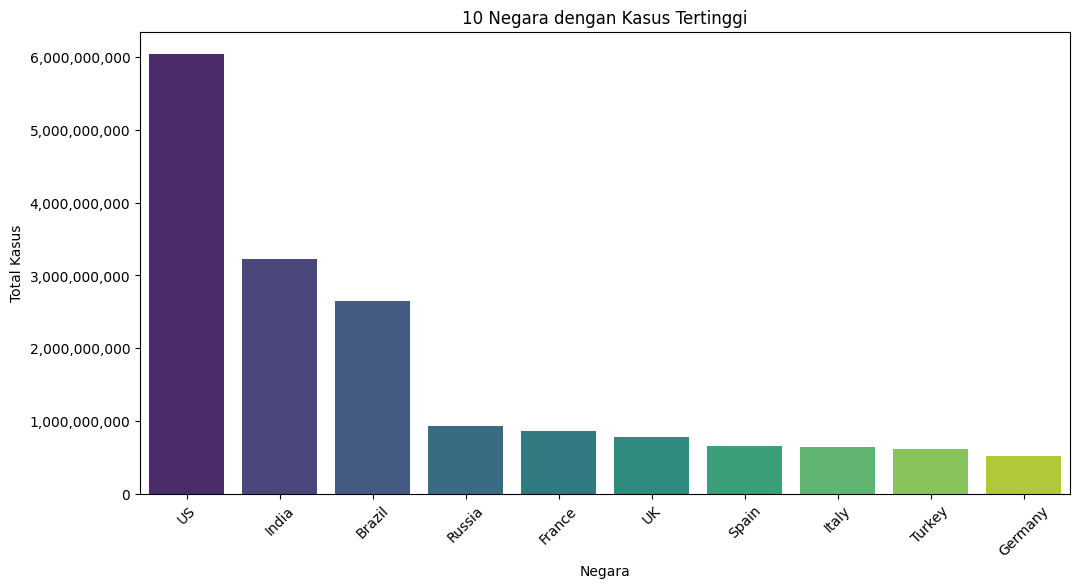

In [12]:
import matplotlib.ticker as ticker

# Buat bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country/Region', y='Confirmed', data=confirmed_by_country_sorted.head(10), palette='viridis')
# plt.bar(deaths_by_country_sorted['Country/Region'].head(10), deaths_by_country_sorted['Deaths'].head(10))
plt.title('10 Negara dengan Kasus Tertinggi')
plt.xlabel('Negara')
plt.ylabel('Total Kasus')
plt.xticks(rotation=45)

# Format sumbu Y untuk menampilkan nilai asli
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [13]:
# plt.figure(figsize=(10, 6))
# sns.histplot(df2['Confirmed'], bins=50, kde=True)
# plt.title('Distribusi Kasus Terkonfirmasi')
# plt.show()

In [14]:
# import matplotlib.pyplot as plt

# # Plot histogram untuk kolom numerik
# plt.figure(figsize=(15, 5))
# numeric_columns = ['Confirmed', 'Deaths', 'Recovered']
# for i, column in enumerate(numeric_columns, 1):
#     plt.subplot(1, 3, i)
#     plt.hist(df2[column], bins=30, color='skyblue', edgecolor='black')
#     plt.title(f'Distribusi {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frekuensi')

# plt.tight_layout()
# plt.show()

In [15]:
# # Menggunakan IQR (Interquartile Range) untuk mendeteksi outlier
# Q1 = df2['Confirmed'].quantile(0.25)
# Q3 = df2['Confirmed'].quantile(0.75)
# IQR = Q3 - Q1

# outliers = df2[(df2['Confirmed'] < (Q1 - 1.5 * IQR)) | (df2['Confirmed'] > (Q3 + 1.5 * IQR))]
# print("Outlier pada kolom Confirmed:")
# print(Q3 + 1.5 * IQR, Q1 - 1.5 * IQR)
# print(len(outliers))

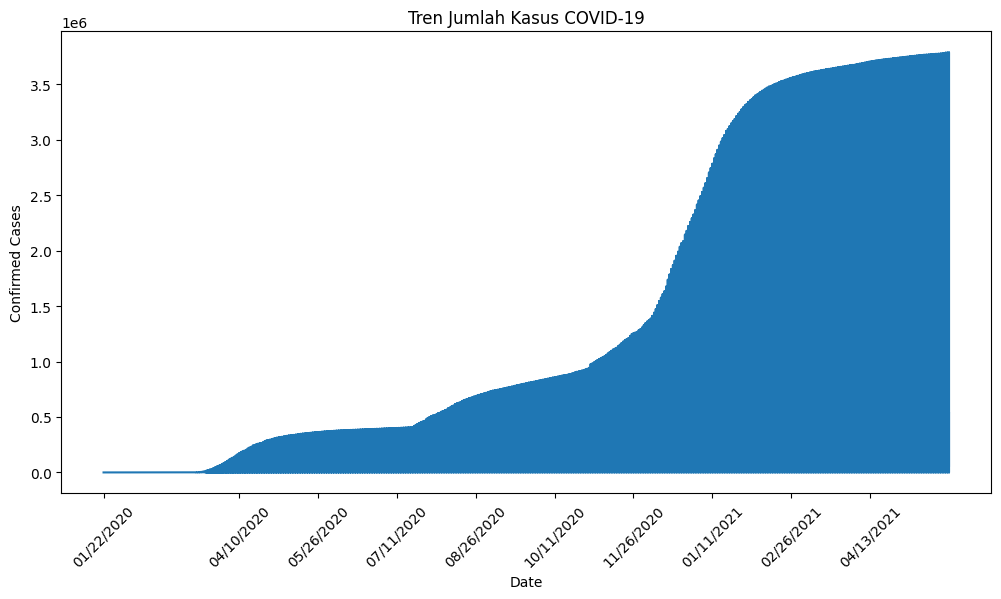

In [16]:
usa = df2[df2['Country/Region'] == 'US']
# global_cases = usa.groupby('ObservationDate')['Confirmed'].sum()
plt.figure(figsize=(12, 6))
plt.plot(usa['ObservationDate'], usa['Confirmed'])
plt.xlabel('Date')  # Label sumbu X
plt.ylabel('Confirmed Cases')  # Label sumbu Y
plt.title('Tren Jumlah Kasus COVID-19')  # Judul grafik
# plt.grid(True)  # Menambahkan grid untuk memudahkan pembacaan
# plt.xticks(rotation=45)
# global_cases.plot(title='Tren Kasus COVID-19 Global')
plt.xticks(
    ticks=usa['ObservationDate'][::len(usa) // 10],  # Ambil 10 titik secara merata
    labels=usa['ObservationDate'][::len(usa) // 10],
    rotation=45  # Memutar label agar lebih mudah dibaca
)

plt.show()

In [17]:
df4 = df3[['ObservationDate','Country/Region','Confirmed']]
df4.rename(columns={'ObservationDate':'Date'}, inplace=True)

df4

C:\Users\raraslab\AppData\Local\Temp\ipykernel_11824\1452225494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.rename(columns={'ObservationDate':'Date'}, inplace=True)


,Date,Country/Region,Confirmed
0,01/22/2020,Mainland China,1.0
1,01/22/2020,Mainland China,14.0
2,01/22/2020,Mainland China,6.0
3,01/22/2020,Mainland China,1.0
4,01/22/2020,Mainland China,0.0
...,...,...,...
306424,05/29/2021,Ukraine,102641.0
306425,05/29/2021,Netherlands,29147.0
306426,05/29/2021,Mainland China,1364.0
306427,05/29/2021,Ukraine,87550.0


In [18]:
# Cek duplikat berdasarkan kolom 'Date' dan 'Country/Region'
duplicates = df4.duplicated(subset=['Date', 'Country/Region'], keep=False)

# Tampilkan baris yang memiliki kombinasi 'Date' dan 'Country/Region' yang sama
duplicated_rows = df4[duplicates]
# print(duplicated_rows)
len(duplicated_rows)

228247

In [19]:
df5 = df4.groupby(['Date','Country/Region'], as_index=False).agg({'Confirmed': 'sum'}).sort_values(by='Confirmed', ascending=True)
df5.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
dtype: int64

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Muat dataset
# data = pd.read_csv('covid_19_data.csv')

# Filter data untuk negara tertentu
country_data = df5[df5['Country/Region'] == 'US']

# Pilih kolom 'Confirmed' dan ubah ke format datetime
confirmed_cases = country_data[['Date', 'Confirmed']]
confirmed_cases['Date'] = pd.to_datetime(confirmed_cases['Date'])
confirmed_cases.set_index('Date', inplace=True)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(confirmed_cases[['Confirmed']])

# Membagi data menjadi train dan test (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Fungsi untuk membuat dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Time step (misalnya 30 hari)
time_step = 30

# Membuat dataset untuk train dan test
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape input untuk LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

C:\Users\raraslab\AppData\Local\Temp\ipykernel_11824\1749857881.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_cases['Date'] = pd.to_datetime(confirmed_cases['Date'])


In [21]:
# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Latih model
model.fit(X_train, Y_train, batch_size=1, epochs=10)

C:\Users\raraslab\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0142
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.2328e-04
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0026
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.7562e-04
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8470e-04
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2137e-04
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.7158e-04
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4267e-04
Epoch 9/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4050e-04
Epoch 10/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.9574e-05


In [22]:
from sklearn.metrics import mean_squared_error

# Prediksi pada data training dan testing
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform untuk mendapatkan nilai asli
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Hitung RMSE untuk data testing
rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
print(f'RMSE untuk data testing: {rmse}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
RMSE untuk data testing: 207801.9435215615


In [23]:
# Prediksi 30 hari ke depan
future_days = 30
last_30_days = scaled_data[-time_step:]
predictions = []

for i in range(future_days):
    pred = model.predict(last_30_days.reshape(1, time_step, 1))
    predictions.append(pred[0, 0])
    last_30_days = np.append(last_30_days[1:], pred)

# Inverse transform untuk mendapatkan nilai asli
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

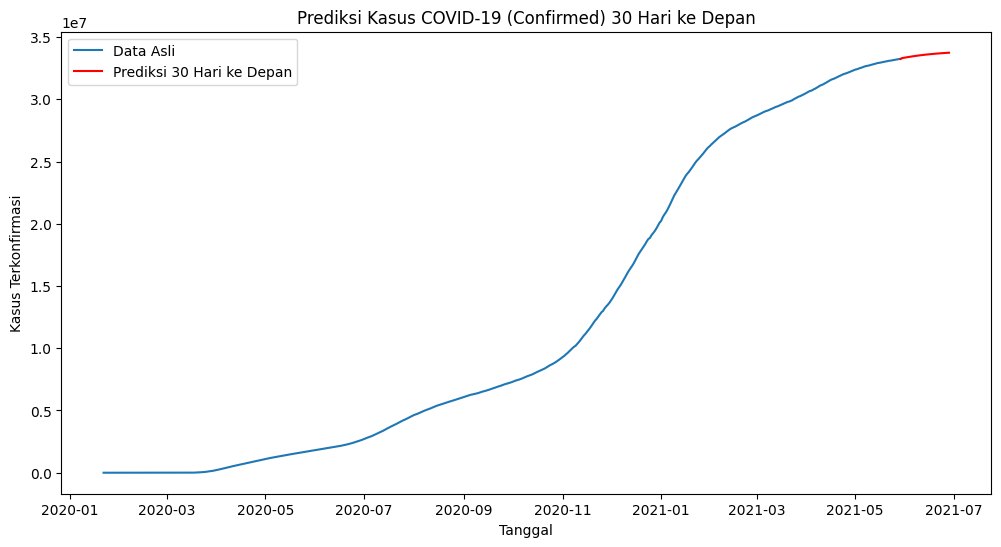

In [24]:
# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(confirmed_cases.index, confirmed_cases['Confirmed'], label='Data Asli')

# Buat tanggal untuk prediksi 30 hari ke depan
prediction_dates = pd.date_range(start=confirmed_cases.index[-1], periods=future_days + 1)

# Plot prediksi
plt.plot(prediction_dates, np.append(confirmed_cases['Confirmed'].values[-1], predictions), 
         label='Prediksi 30 Hari ke Depan', color='red')

plt.title('Prediksi Kasus COVID-19 (Confirmed) 30 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Terkonfirmasi')
plt.legend()
plt.show()